In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import calendar

In [26]:
sleep_data = pd.read_csv('data/sleep_list.csv')
sleep_data.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,awakeCount,awakeDuration,awakeningsCount,dateOfSleep,duration,efficiency,isMainSleep,logId,minutesAfterWakeup,minutesAsleep,minutesAwake,minutesToFallAsleep,restlessCount,restlessDuration,startTime,timeInBed
0,0,0.0,0.0,1,2,6,2016-12-14,32220000,98,True,13220819856,0,528,9,0,5,7,2016-12-13T21:52:00.000,537
1,1,1.0,1.0,0,0,3,2016-12-13,24420000,99,True,13212858521,0,404,3,0,3,3,2016-12-12T23:13:30.000,407
2,2,2.0,2.0,0,0,3,2016-12-12,28680000,99,True,13204023165,0,472,6,0,3,6,2016-12-11T22:13:00.000,478
3,3,3.0,3.0,1,2,4,2016-12-11,29640000,99,True,13198145736,0,489,5,0,3,3,2016-12-10T22:35:30.000,494
4,4,4.0,4.0,0,0,8,2016-12-10,26040000,95,True,13190828758,0,413,21,0,8,21,2016-12-09T23:59:00.000,434


In [27]:
sleep_data = sleep_data.loc[sleep_data['isMainSleep']]  # Remove naps
sleep_data['dateOfSleep'] = pd.to_datetime(sleep_data['dateOfSleep'])
sleep_data['startTime'] = pd.to_datetime(sleep_data['startTime'])
sleep_data.dtypes

Unnamed: 0                      int64
Unnamed: 0.1                  float64
Unnamed: 0.1.1                float64
awakeCount                      int64
awakeDuration                   int64
awakeningsCount                 int64
dateOfSleep            datetime64[ns]
duration                        int64
efficiency                      int64
isMainSleep                      bool
logId                           int64
minutesAfterWakeup              int64
minutesAsleep                   int64
minutesAwake                    int64
minutesToFallAsleep             int64
restlessCount                   int64
restlessDuration                int64
startTime              datetime64[ns]
timeInBed                       int64
dtype: object

In [28]:
sleep_data = sleep_data[['dateOfSleep', 'awakeningsCount', 'duration', 'efficiency', 'minutesAsleep',
                         'minutesAwake', 'minutesToFallAsleep', 'restlessCount', 'startTime', 'timeInBed']]
sleep_data.head()

,dateOfSleep,awakeningsCount,duration,efficiency,minutesAsleep,minutesAwake,minutesToFallAsleep,restlessCount,startTime,timeInBed
0,2016-12-14,6,32220000,98,528,9,0,5,2016-12-13 21:52:00,537
1,2016-12-13,3,24420000,99,404,3,0,3,2016-12-12 23:13:30,407
2,2016-12-12,3,28680000,99,472,6,0,3,2016-12-11 22:13:00,478
3,2016-12-11,4,29640000,99,489,5,0,3,2016-12-10 22:35:30,494
4,2016-12-10,8,26040000,95,413,21,0,8,2016-12-09 23:59:00,434


In [31]:
sleep_data['start_night'] = sleep_data['dateOfSleep'].apply(lambda x: calendar.day_name[x.weekday()])
sleep_data['hours_asleep'] = sleep_data['minutesAsleep'].apply(lambda x: x / 60)
sleep_data.head()

,dateOfSleep,awakeningsCount,duration,efficiency,minutesAsleep,minutesAwake,minutesToFallAsleep,restlessCount,startTime,timeInBed,start_night,hours_asleep
0,2016-12-14,6,32220000,98,528,9,0,5,2016-12-13 21:52:00,537,Wednesday,8.800000
1,2016-12-13,3,24420000,99,404,3,0,3,2016-12-12 23:13:30,407,Tuesday,6.733333
2,2016-12-12,3,28680000,99,472,6,0,3,2016-12-11 22:13:00,478,Monday,7.866667
3,2016-12-11,4,29640000,99,489,5,0,3,2016-12-10 22:35:30,494,Sunday,8.150000
4,2016-12-10,8,26040000,95,413,21,0,8,2016-12-09 23:59:00,434,Saturday,6.883333


In [39]:
sleep_data.groupby('start_night')['hours_asleep'].mean()

start_night
Friday       6.333987
Monday       7.672115
Saturday     7.807692
Sunday       7.311224
Thursday     7.115667
Tuesday      6.711000
Wednesday    7.140523
Name: hours_asleep, dtype: float64

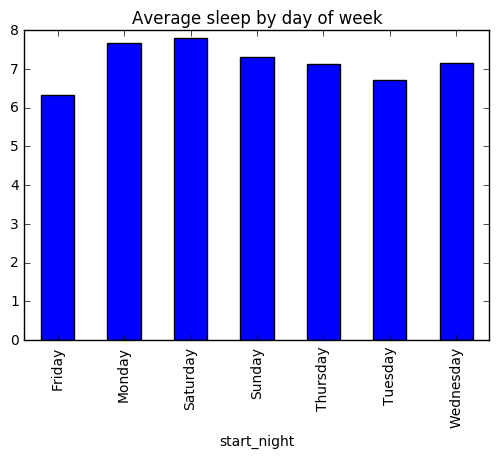

In [40]:
sleep_data.groupby('start_night')['hours_asleep'].mean().plot(kind='bar', title='Average sleep by day of week')

In [42]:
sleep_data['month'] = sleep_data['dateOfSleep'].apply(lambda x: calendar.month_name[x.month])

In [43]:
sleep_data

,dateOfSleep,awakeningsCount,duration,efficiency,minutesAsleep,minutesAwake,minutesToFallAsleep,restlessCount,startTime,timeInBed,start_night,hours_asleep,month
0,2016-12-14,6,32220000,98,528,9,0,5,2016-12-13 21:52:00,537,Wednesday,8.800000,December
1,2016-12-13,3,24420000,99,404,3,0,3,2016-12-12 23:13:30,407,Tuesday,6.733333,December
2,2016-12-12,3,28680000,99,472,6,0,3,2016-12-11 22:13:00,478,Monday,7.866667,December
3,2016-12-11,4,29640000,99,489,5,0,3,2016-12-10 22:35:30,494,Sunday,8.150000,December
4,2016-12-10,8,26040000,95,413,21,0,8,2016-12-09 23:59:00,434,Saturday,6.883333,December
5,2016-12-09,7,23640000,98,385,9,0,7,2016-12-08 23:50:30,394,Friday,6.416667,December
6,2016-12-08,8,25260000,97,407,14,0,7,2016-12-07 23:10:00,421,Thursday,6.783333,December
7,2016-12-07,5,30360000,98,496,10,0,5,2016-12-06 22:08:00,506,Wednesday,8.266667,December
8,2016-12-06,9,29040000,97,466,14,0,7,2016-12-05 22:02:00,484,Tuesday,7.766667,December
9,2016-12-05,5,31200000,99,513,7,0,4,2016-12-04 21:17:00,520,Monday,8.550000,December


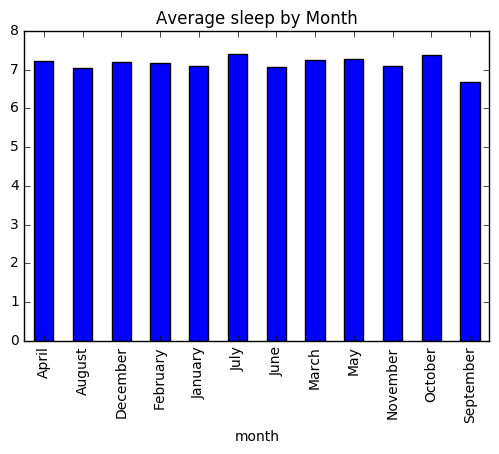

In [44]:
sleep_data.groupby('month')['hours_asleep'].mean().plot(kind='bar', title='Average sleep by Month')